In [ ]:
pip install plotly


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV file
data_path = os.path.join("..", "data", "Nifty50_Train.csv")
df = pd.read_csv(data_path)



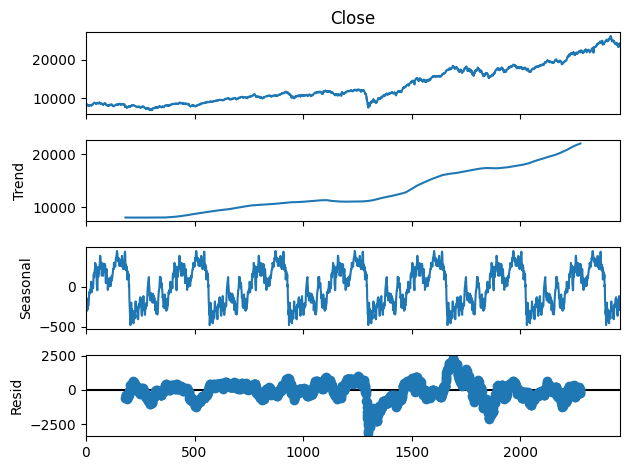

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)
decomposition.plot()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Load the CSV file

data_path = os.path.join("..", "data", "Nifty50_Train.csv")
data = pd.read_csv(data_path,parse_dates=["Date"], index_col="Date")


# Perform decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=365)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Create subplots with 4 rows (Observed, Trend, Seasonal, Residual)
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("Observed", "Trend", "Seasonality", "Residual"))

# Add Observed data
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name="Observed"), row=1, col=1)

# Add Trend data
fig.add_trace(go.Scatter(x=data.index, y=trend, name="Trend"), row=2, col=1)

# Add Seasonality data
fig.add_trace(go.Scatter(x=data.index, y=seasonal, name="Seasonality"), row=3, col=1)

# Add Residual data
fig.add_trace(go.Scatter(x=data.index, y=residual, name="Residual"), row=4, col=1)

# Update layout
fig.update_layout(height=800, width=1000, title_text="Time Series Decomposition", showlegend=False)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Load your dataset (replace with your own file path)
data_path = os.path.join("..", "data", "Nifty50_Train.csv")
data = pd.read_csv(data_path,parse_dates=["Date"], index_col="Date")

# Perform time series decomposition (assuming daily data)
decomposition = seasonal_decompose(data['Close'], model='additive', period=365)

# Create subplots to display the components
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=["Original Data", "Trend", "Seasonal", "Residual"],
                    vertical_spacing=0.1)

# Plot the original closing price
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Original Data'),
              row=1, col=1)

# Plot the trend component
fig.add_trace(go.Scatter(x=data.index, y=decomposition.trend, mode='lines', name='Trend'),
              row=2, col=1)

# Plot the seasonal component
fig.add_trace(go.Scatter(x=data.index, y=decomposition.seasonal, mode='lines', name='Seasonal'),
              row=3, col=1)

# Plot the residual/noise component
fig.add_trace(go.Scatter(x=data.index, y=decomposition.resid, mode='lines', name='Residual'),
              row=4, col=1)

# Update layout and axis labels
fig.update_layout(
    title="Time Series Decomposition of Stock Data",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_dark",
    height=800
)

# Update y-axis to show full values (no abbreviations like 1k, 2k)
fig.update_yaxes(tickformat="f")

# Show the plot
fig.show()
